<a href="https://colab.research.google.com/github/sjw8793/DS2023-HateCrimeAnalysis/blob/main/HateCrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/SSU2023_1/DataScience"

Mounted at /content/gdrive
/content/gdrive/MyDrive/SSU2023_1/DataScience


In [48]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import plotly.express as px

In [3]:
df = pd.read_csv('hate_crime.csv',sep=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226328 entries, 0 to 226327
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   incident_id                   226328 non-null  int64  
 1   data_year                     226328 non-null  int64  
 2   ori                           226328 non-null  object 
 3   pug_agency_name               226328 non-null  object 
 4   pub_agency_unit               6563 non-null    object 
 5   agency_type_name              226328 non-null  object 
 6   state_abbr                    226328 non-null  object 
 7   state_name                    226328 non-null  object 
 8   division_name                 226328 non-null  object 
 9   region_name                   226328 non-null  object 
 10  population_group_code         225924 non-null  object 
 11  population_group_description  225924 non-null  object 
 12  incident_date                 226328 non-nul

In [5]:
df.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S


In [6]:
df.describe()

,incident_id,data_year,adult_victim_count,juvenile_victim_count,total_offender_count,adult_offender_count,juvenile_offender_count,victim_count,total_individual_victims
count,2.263280e+05,226328.000000,58203.000000,56331.000000,226328.000000,53462.000000,53455.000000,226328.000000,222849.000000
mean,2.709189e+05,2005.943476,0.681735,0.089862,0.960120,0.563840,0.106538,1.247592,0.984492
std,4.359237e+05,8.871649,1.187793,0.502419,1.343262,0.837653,0.492589,2.243617,1.162006
min,2.000000e+00,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.661075e+04,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.132045e+05,2005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.697902e+05,2014.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.450227e+06,2021.000000,146.000000,60.000000,99.000000,60.000000,20.000000,900.000000,147.000000


In [7]:
null_counts = df.isnull().sum()
print(null_counts)

incident_id                          0
data_year                            0
ori                                  0
pug_agency_name                      0
pub_agency_unit                 219765
agency_type_name                     0
state_abbr                           0
state_name                           0
division_name                        0
region_name                          0
population_group_code              404
population_group_description       404
incident_date                        0
adult_victim_count              168125
juvenile_victim_count           169997
total_offender_count                 0
adult_offender_count            172866
juvenile_offender_count         172873
offender_race                        0
offender_ethnicity                   0
victim_count                         0
offense_name                         0
total_individual_victims          3479
location_name                        0
bias_desc                            0
victim_types             

- incident_id 
  - 해당 범죄 사건이 발생한 사건에 대한 참조 ID
- data_year
  - 해당 범죄 사건이 발생한 년도
- ori
  - 
- pug_agency_name 
  - 내부 기관 이름
- pub_agency_unit
  - 내부 기관 단체
- agency_type_name
  - 내부기관 종류 이
- state_abbr 
  - 범죄 발생 주 이름 약어
- state_name
  - 범죄 발생 주 이름
- division_name
  - ?
- region_name
  - 범죄 발생 지역 이름
- population_group_code
  - 인구 지역 코드
- population_group_description
  - ?
- incident_date
  - 사건이 발생한 날
- adult_victim_count
  - 성인 피해자 수
- juvenile_victim_count
  - 청소년 피해자 수
- total_offender_count
  - 총 가해자 수
- adult_offender_count
  - 성인 가해자 수
- juvenile_offender_count
  - 청소년 가해자 수
- offender_race
  - 가해자 인종
- offender_ethnicity
  - 가해자 민족성
- victim_count 
  - 피해자 수
- offense_name
  - 가해자 이름
- total_individual_victims
  - 총 개인 피해자 수
- location_name
  - 발생 장소 이름
- bias_desc
  - 편견 설명
- victim_types
  - 피해자 종류
- multiple_offense
  - 다중범죄 : 
- multiple_bias
  - 다중 편견 증오 범죄 : 하나 이상의 범죄가 둘 이상의 편견에 의해 동기가 부여된 사건

## DATA 수집 관련
- 증오 범죄 통계 데이터 세트는 피해자의 인식된 인종, 성별, 성 정체성, 종교, 장애, 성적 취향 또는 민족. UCR 프로그램에 이미 보고된 범죄에 존재하는 편견 요소를 표시하여 증오 범죄 데이터를 수집
- 증오범죄 신고 방법 
  - 법 집행 조사에서 합리적이고 신중한 사람이 범인의 행동이 전체적으로 OR 분적으로 편견에 의해 동기가 부여되었다고 결론을 내릴 수 있는 충분한 증거가 밝혀진 경우

In [17]:
print(df['pub_agency_unit'].unique())

[nan 'Boulder' 'Urbana' 'Montgomery County' 'College Park'
 'Anne Arundel County' 'Carroll County' 'Cecil County' 'Charles County'
 'Frederick County' 'Harford County' "Queen Anne's County"
 'Wicomico County' 'Worcester County' 'Baltimore County'
 "Prince George's County" 'Twin Cities' 'Albany' 'Binghamton' 'Cortland'
 'Buffalo State College' 'Morrisville' 'Old Westbury' 'Oswego' 'Potsdam'
 'Stony Brook' 'New Paltz' 'Purchase' 'Dutchess County' 'Orange County'
 'Oswego County' 'Sullivan County' 'Ulster County' 'Wayne County' 'Delhi'
 'Geneseo' 'Polytechnic Institute' 'Columbus' 'Crook County'
 'Curry County' 'Jackson County' 'Lincoln County' 'Linn County'
 'Marion County' 'Chester County' 'Lancaster County' 'Monroe County'
 'Washington County' 'Westmoreland County' 'Blair County' 'Smyth County'
 'Wythe County' 'Milwaukee' 'East Bay' 'Fullerton' 'Kent County'
 'New Castle County' 'Sussex County' 'Tampa' 'Tallahassee' 'Chicago'
 'Calvert County' 'Caroline County' 'Orono' 'Ann Arbor' 'Cha

In [19]:
print(df['pub_agency_unit'].value_counts())

Ann Arbor                                153
New Castle County                        137
Los Angeles                              122
College Park                             119
Storrs, Avery Point, and Hartford        118
                                        ... 
San Luis Obispo Coast                      1
Wooster                                    1
Channel Islands                            1
Pueblo                                     1
Internet Crimes Against Children Unit      1
Name: pub_agency_unit, Length: 648, dtype: int64


## Dropping Column
- 'INCIDENT_ID', 'ORI', 'PUB_AGENCY_NAME','PUB_AGENCY_UNIT','AGENCY_TYPE_NAME',
  - 시각화에 필요X
- 'ADULT_VICTIM_COUNT','JUVENILE_VICTIM_COUNT','ADULT_OFFENDER_COUNT','JUVENILE_OFFENDER_COUNT','OFFENDER_ETHNICITY'
  - 결측치가 너무 많으므로 drop
- 'TOTAL_INDIVIDUAL_VICTIMS
  - 'VICTIM_COUNT'가 있으므로 필요x

In [25]:
drop_col_list = ['incident_id', 'ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'adult_victim_count', 'juvenile_victim_count','adult_offender_count', 'juvenile_offender_count','offender_ethnicity', 'total_individual_victims']
drop_col_list

['incident_id',
 'ori',
 'pug_agency_name',
 'pub_agency_unit',
 'agency_type_name',
 'adult_victim_count',
 'juvenile_victim_count',
 'adult_offender_count',
 'juvenile_offender_count',
 'offender_ethnicity',
 'total_individual_victims']

In [26]:
df = df.drop(drop_col_list, axis=1)

In [27]:
df.head()

,data_year,state_abbr,state_name,division_name,region_name,population_group_code,population_group_description,incident_date,total_offender_count,offender_race,victim_count,offense_name,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,1991,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S,S
1,1991,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,1991,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-07-10,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,Residence/Home,Anti-White,Individual,M,S
3,1991,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-10-06,2,Black or African American,1,Intimidation,Residence/Home,Anti-White,Individual,S,S
4,1991,AR,Arkansas,West South Central,South,8D,"Non-MSA counties under 10,000",1991-10-14,1,White,1,Intimidation,School/College,Anti-Black or African American,Individual,S,S


In [28]:
# 2017년부터만 분석
df = df[(df['data_year'] >= 2017) & (df['data_year'] <= 2021)]

In [29]:
df.isna().sum()

data_year                         0
state_abbr                        0
state_name                        0
division_name                     0
region_name                       0
population_group_code           404
population_group_description    404
incident_date                     0
total_offender_count              0
offender_race                     0
victim_count                      0
offense_name                      0
location_name                     0
bias_desc                         0
victim_types                      0
multiple_offense                  0
multiple_bias                     0
dtype: int64

In [32]:
print(df['population_group_code'].unique())
print('---------------------------------------------')
print(df['population_group_description'].unique())

['4' '8A' '1C' '7' '5' '2' '3' '8C' '9B' '8D' '6' '1B' '1A' '8B' '9A' '9D'
 '9C' nan '8E' '9E']
---------------------------------------------
['Cities from 25,000 thru 49,999' 'Non-MSA counties 100,000 or over'
 'Cities from 250,000 thru 499,999' 'Cities under 2,500'
 'Cities from 10,000 thru 24,999' 'Cities from 100,000 thru 249,999'
 'Cities from 50,000 thru 99,999'
 'Non-MSA counties from 10,000 thru 24,999'
 'MSA counties from 25,000 thru 99,999' 'Non-MSA counties under 10,000'
 'Cities from 2,500 thru 9,999' 'Cities from 500,000 thru 999,999'
 'Cities 1,000,000 or over' 'Non-MSA counties from 25,000 thru 99,999'
 'MSA counties 100,000 or over' 'MSA counties under 10,000'
 'MSA counties from 10,000 thru 24,999' nan 'Non-MSA State Police'
 'MSA State Police']


In [34]:
df2 = df.copy()
df2.iloc[:,5] = np.where(df2.iloc[:,5].isnull(), 'Unknown', df2.iloc[:,5])
df2.iloc[:,6] = np.where(df2.iloc[:,6].isnull(), 'Unknown', df2.iloc[:,6])

In [37]:
print(df2['population_group_code'].unique())
print('---------------------------------------------')
print(df2['population_group_description'].unique())

['4' '8A' '1C' '7' '5' '2' '3' '8C' '9B' '8D' '6' '1B' '1A' '8B' '9A' '9D'
 '9C' 'Unknown' '8E' '9E']
---------------------------------------------
['Cities from 25,000 thru 49,999' 'Non-MSA counties 100,000 or over'
 'Cities from 250,000 thru 499,999' 'Cities under 2,500'
 'Cities from 10,000 thru 24,999' 'Cities from 100,000 thru 249,999'
 'Cities from 50,000 thru 99,999'
 'Non-MSA counties from 10,000 thru 24,999'
 'MSA counties from 25,000 thru 99,999' 'Non-MSA counties under 10,000'
 'Cities from 2,500 thru 9,999' 'Cities from 500,000 thru 999,999'
 'Cities 1,000,000 or over' 'Non-MSA counties from 25,000 thru 99,999'
 'MSA counties 100,000 or over' 'MSA counties under 10,000'
 'MSA counties from 10,000 thru 24,999' 'Unknown' 'Non-MSA State Police'
 'MSA State Police']


American Indian or Alaska Native 와 Native Hawaiian or Other Pacific Islander를 Others로 결합
=> 미국 본토 대부분의 지역 사회에서는 태평양 섬 주민들이 소수이므로 섬 주민은 종종 다른 인종(특히, 백인 및 아시아인)과 혼합됨.

In [38]:
df2.iloc[:,9] = np.where((df2.iloc[:,9] == 'American Indian or Alaska Native') | (df2.iloc[:,9] == 'Native Hawaiian or Other Pacific Islander'),'Others', df2.iloc[:,9])

In [39]:
df2['offender_race'].unique()

array(['Others', 'Unknown', 'Black or African American', 'White',
       'Not Specified', 'Multiple', 'Asian'], dtype=object)

In [41]:
df2['region_name'].unique()

array(['West', 'South', 'Northeast', 'Other', 'Midwest'], dtype=object)

In [43]:
df2['incident_date'] = pd.to_datetime(df2['incident_date'], format = '%Y-%m-%d')
df2.head(5)

,data_year,state_abbr,state_name,division_name,region_name,population_group_code,population_group_description,incident_date,total_offender_count,offender_race,victim_count,offense_name,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
186808,2017,AK,Alaska,Pacific,West,4,"Cities from 25,000 thru 49,999",2017-12-22,1,Others,1,Simple Assault,Residence/Home,Anti-White,Individual,S,S
186809,2017,AK,Alaska,Pacific,West,4,"Cities from 25,000 thru 49,999",2017-10-24,0,Unknown,1,Destruction/Damage/Vandalism of Property,School-College/University,"Anti-Multiple Races, Group",Government,S,S
186810,2017,AK,Alaska,Pacific,West,8A,"Non-MSA counties 100,000 or over",2017-05-04,0,Unknown,1,Destruction/Damage/Vandalism of Property,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,S,S
186811,2017,AK,Alaska,Pacific,West,1C,"Cities from 250,000 thru 499,999",2017-10-29,1,Black or African American,1,Aggravated Assault,Amusement Park,Anti-White,Individual,S,S
186812,2017,AL,Alabama,East South Central,South,7,"Cities under 2,500",2017-09-23,1,Black or African American,1,Intimidation,School-College/University,Anti-White,Individual,S,S


In [44]:
df2.isna().sum()

data_year                       0
state_abbr                      0
state_name                      0
division_name                   0
region_name                     0
population_group_code           0
population_group_description    0
incident_date                   0
total_offender_count            0
offender_race                   0
victim_count                    0
offense_name                    0
location_name                   0
bias_desc                       0
victim_types                    0
multiple_offense                0
multiple_bias                   0
dtype: int64

## 2017~2021 년도별 hate_crimes 건 수

In [81]:
df2017 = df2.groupby(['data_year', 'incident_date']).agg(number_of_cases = ('incident_date', 'size'))
agg_data_2017 = pd.DataFrame(df2017).reset_index()
agg_data_2017.columns = ['data_year', 'incident_date', 'number_of_cases']
agg_data_2017

,data_year,incident_date,number_of_cases
0,2017,2017-01-01,26
1,2017,2017-01-02,12
2,2017,2017-01-03,12
3,2017,2017-01-04,12
4,2017,2017-01-05,21
...,...,...,...
1821,2021,2021-12-27,12
1822,2021,2021-12-28,13
1823,2021,2021-12-29,12
1824,2021,2021-12-30,22


In [83]:
df_2017_hc = agg_data_2017[(agg_data_2017.data_year == 2017)]
df_2017_hc.head(5)

,data_year,incident_date,number_of_cases
0,2017,2017-01-01,26
1,2017,2017-01-02,12
2,2017,2017-01-03,12
3,2017,2017-01-04,12
4,2017,2017-01-05,21


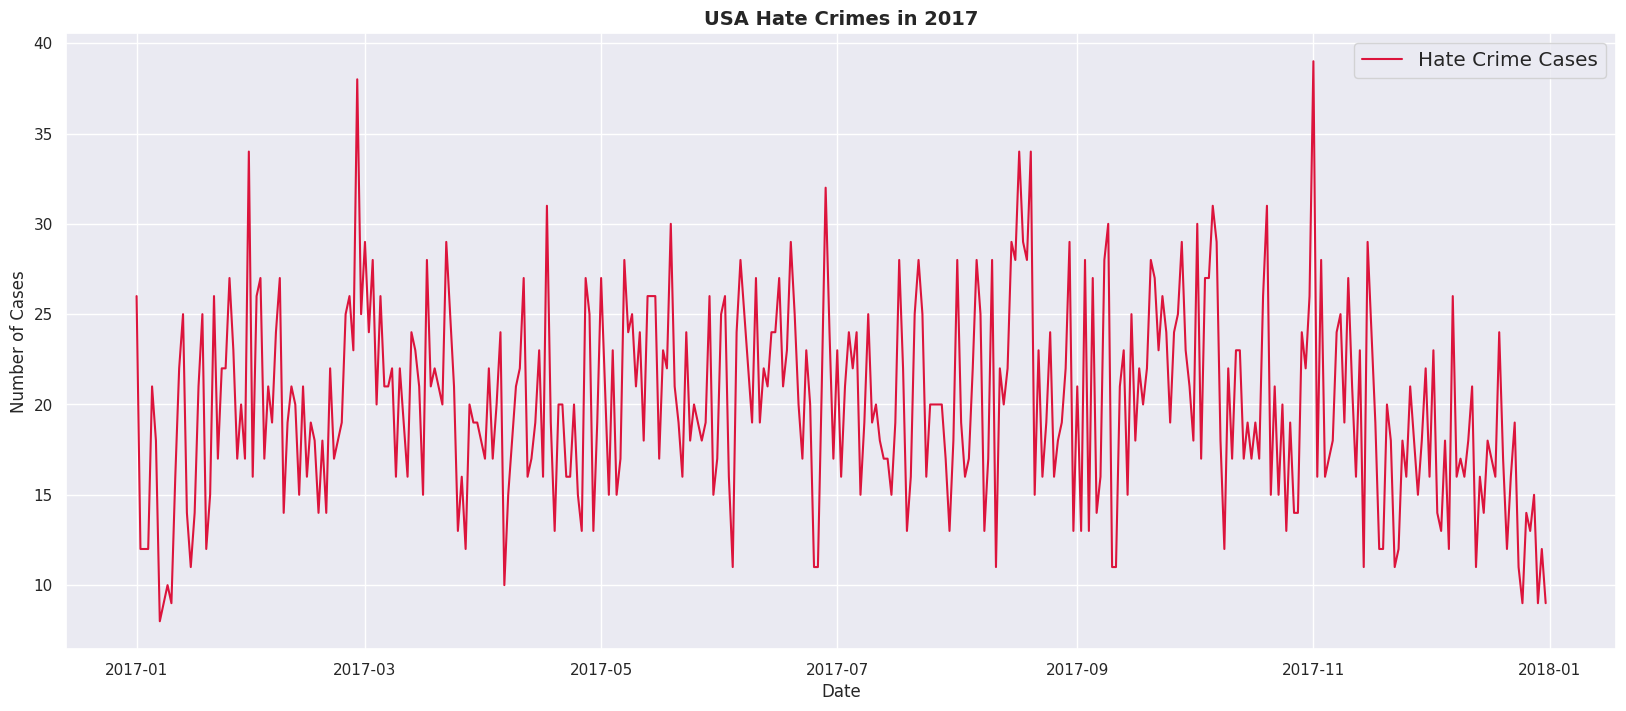

In [86]:
sns.set()

label = ['Hate Crime Cases']
plt.figure(figsize = (20, 8))
plt.plot(df_2017_hc['incident_date'], df_2017_hc['number_of_cases'], color = 'crimson')
plt.title("USA Hate Crimes in 2017", fontsize = 14, fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(labels = label, fontsize = 'large')
plt.show()

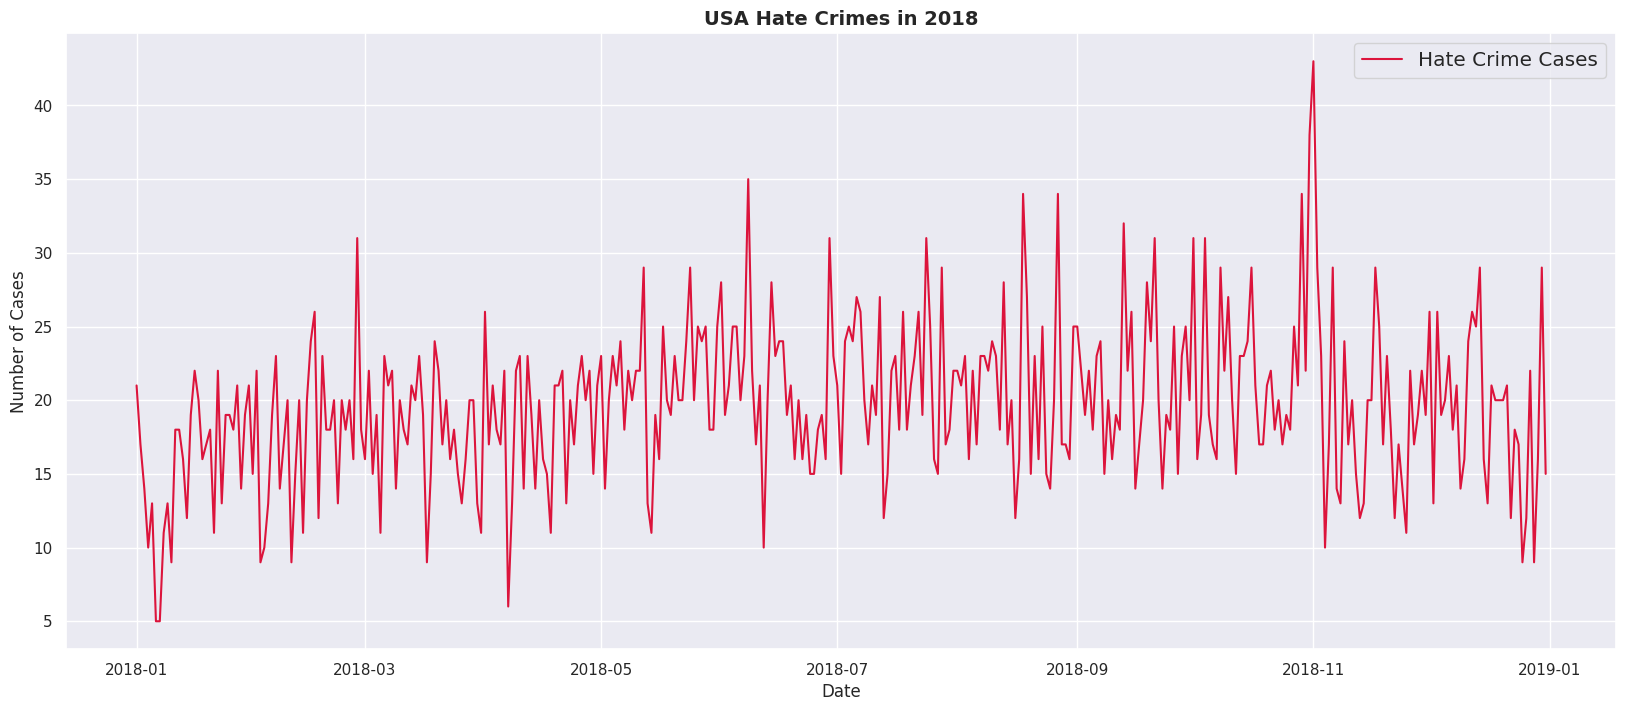

In [87]:
df2018 = df2.groupby(['data_year', 'incident_date']).agg(number_of_cases = ('incident_date', 'size'))
agg_data_2018 = pd.DataFrame(df2018).reset_index()
agg_data_2018.columns = ['data_year', 'incident_date', 'number_of_cases']

df_2018_hc = agg_data_2018[(agg_data_2018.data_year == 2018)]

sns.set()

label = ['Hate Crime Cases']
plt.figure(figsize = (20, 8))
plt.plot(df_2018_hc['incident_date'], df_2018_hc['number_of_cases'], color = 'crimson')
plt.title("USA Hate Crimes in 2018", fontsize = 14, fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(labels = label, fontsize = 'large')
plt.show()

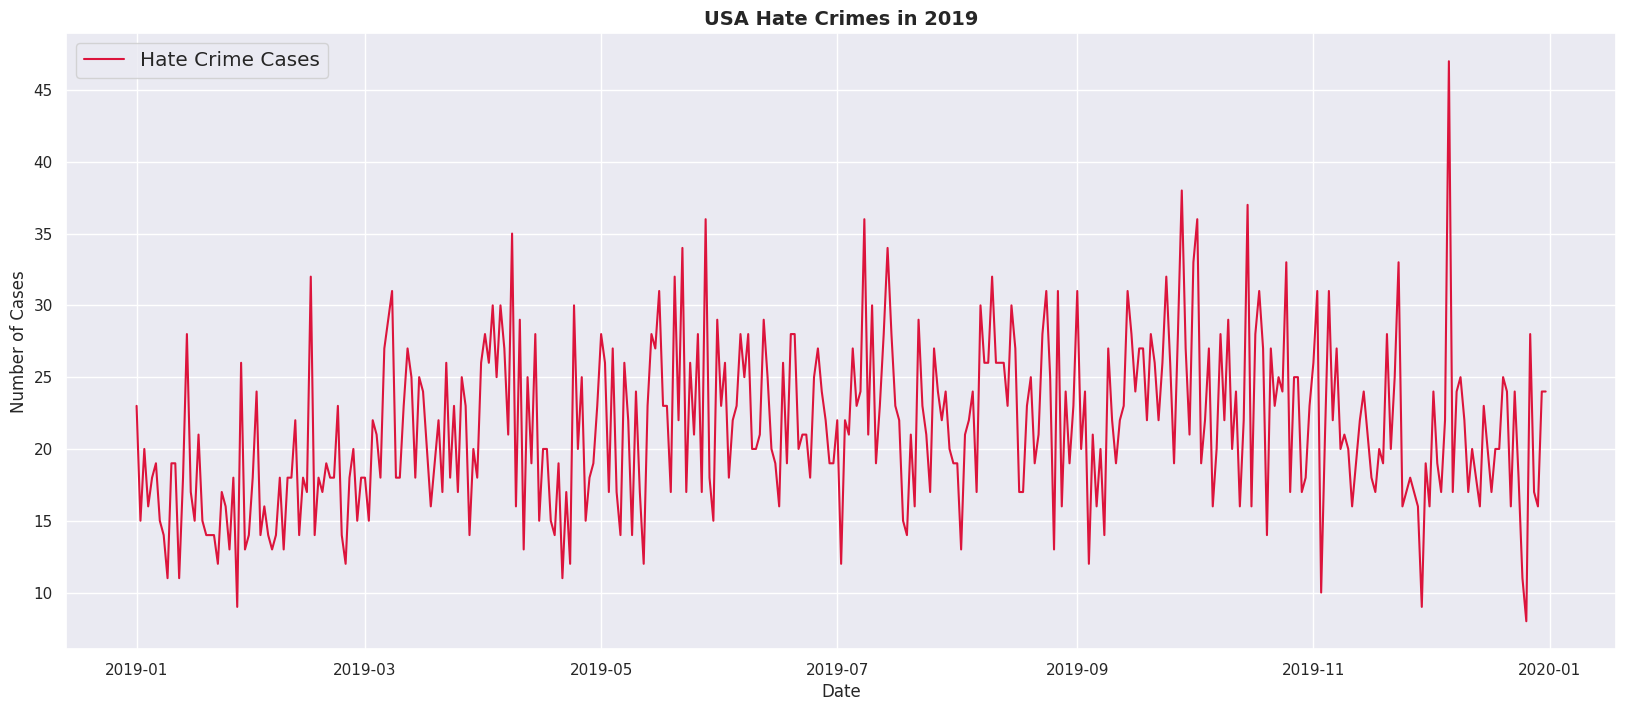

In [88]:
df2019 = df2.groupby(['data_year', 'incident_date']).agg(number_of_cases = ('incident_date', 'size'))
agg_data_2019 = pd.DataFrame(df2019).reset_index()
agg_data_2019.columns = ['data_year', 'incident_date', 'number_of_cases']

df_2019_hc = agg_data_2019[(agg_data_2019.data_year == 2019)]

sns.set()

label = ['Hate Crime Cases']
plt.figure(figsize = (20, 8))
plt.plot(df_2019_hc['incident_date'], df_2019_hc['number_of_cases'], color = 'crimson')
plt.title("USA Hate Crimes in 2019", fontsize = 14, fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(labels = label, fontsize = 'large')
plt.show()

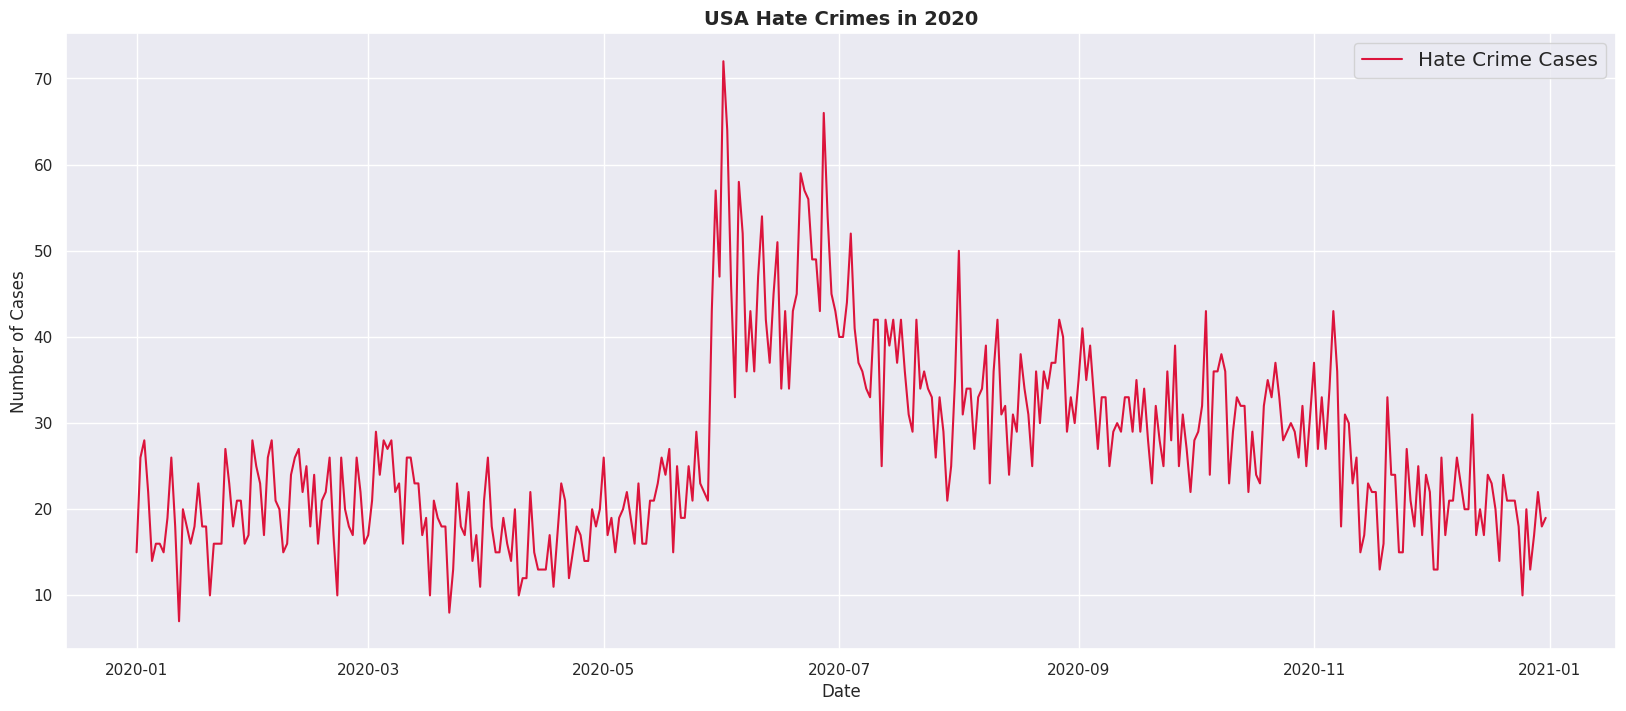

In [89]:
df2020 = df2.groupby(['data_year', 'incident_date']).agg(number_of_cases = ('incident_date', 'size'))
agg_data_2020 = pd.DataFrame(df2020).reset_index()
agg_data_2020.columns = ['data_year', 'incident_date', 'number_of_cases']

df_2020_hc = agg_data_2020[(agg_data_2020.data_year == 2020)]

sns.set()

label = ['Hate Crime Cases']
plt.figure(figsize = (20, 8))
plt.plot(df_2020_hc['incident_date'], df_2020_hc['number_of_cases'], color = 'crimson')
plt.title("USA Hate Crimes in 2020", fontsize = 14, fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(labels = label, fontsize = 'large')
plt.show()

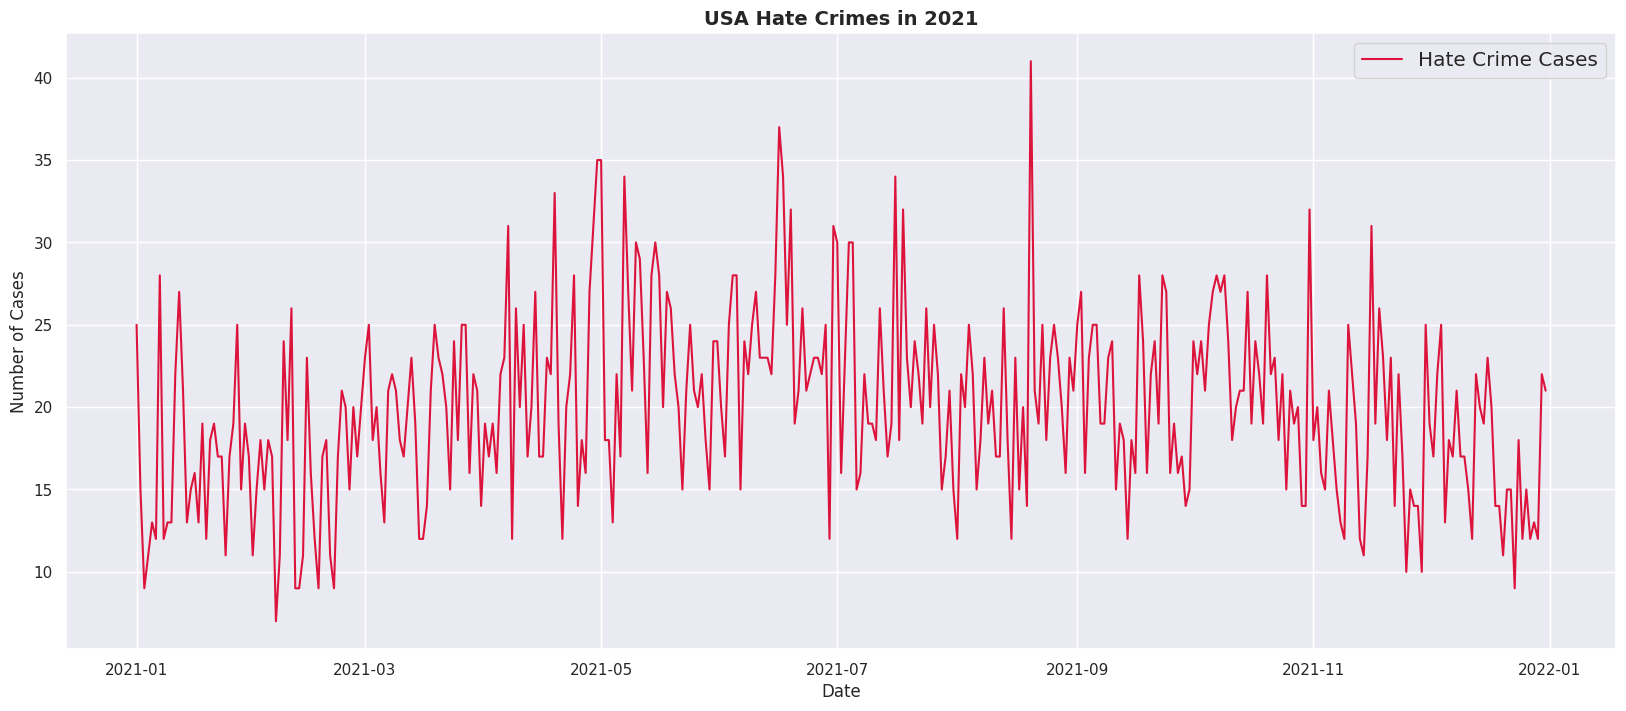

In [90]:
df2021 = df2.groupby(['data_year', 'incident_date']).agg(number_of_cases = ('incident_date', 'size'))
agg_data_2021 = pd.DataFrame(df2021).reset_index()
agg_data_2021.columns = ['data_year', 'incident_date', 'number_of_cases']

df_2021_hc = agg_data_2021[(agg_data_2020.data_year == 2021)]

sns.set()

label = ['Hate Crime Cases']
plt.figure(figsize = (20, 8))
plt.plot(df_2021_hc['incident_date'], df_2021_hc['number_of_cases'], color = 'crimson')
plt.title("USA Hate Crimes in 2021", fontsize = 14, fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(labels = label, fontsize = 'large')
plt.show()

## 2017~2021 년도별 각 주의 증오범죄 사건, 피해자 및 범죄자의 총 수

1. 시각화_영상

In [46]:
df = df2.groupby(['data_year', 'state_abbr', 'state_name']).agg(hate_crime_case = ('state_name', 'size'), number_of_victims = ('victim_count', 'sum'), NUMBER_OF_OFFENDERS = ('total_offender_count', 'sum'))
agg_data = pd.DataFrame(df).reset_index()
agg_data.columns = ['data_year', 'state_abbr', 'state_name', 'hate_crime_case','number_of_victims', 'number_of_offenders']
agg_data

,data_year,state_abbr,state_name,hate_crime_case,number_of_victims,number_of_offenders
0,2017,AK,Alaska,4,4,2
1,2017,AL,Alabama,14,14,11
2,2017,AR,Arkansas,24,27,28
3,2017,AZ,Arizona,264,357,242
4,2017,CA,California,1094,1316,1014
...,...,...,...,...,...,...
253,2021,VT,Vermont,39,46,29
254,2021,WA,Washington,576,748,412
255,2021,WI,Wisconsin,111,121,105
256,2021,WV,West Virginia,56,75,44


In [49]:
fig=px.choropleth(agg_data,
                  locations = 'state_abbr',        
                  animation_frame = 'data_year',       
                  color = 'hate_crime_case',  
                  color_continuous_scale = 'inferno',
                  locationmode = "USA-states",
                  title='Hate Crime cases of each States (2017 - 2021)',
                  scope="usa",
                  hover_name="state_name",
                  hover_data = ['number_of_victims', 'number_of_offenders'],
                  height=700)

fig.update_layout(coloraxis_colorbar_title_text = 'Number of Cases')

fig.show()

2. 시각화_바차트

In [50]:
df_each_year = df2.groupby(['data_year']).agg(hate_crime_case = ('data_year', 'size'), number_of_victims = ('victim_count', 'sum'), number_of_offenders = ('total_offender_count', 'sum'))
df_each_year = pd.DataFrame(df_each_year).reset_index()
df_each_year.columns = ['data_year', 'hate_crime_case','number_of_victims', 'number_of_offenders']
df_each_year

,data_year,hate_crime_case,number_of_victims,number_of_offenders
0,2017,7328,9004,6476
1,2018,7179,8820,6625
2,2019,7856,9345,7050
3,2020,9854,13256,8133
4,2021,7303,9070,6353


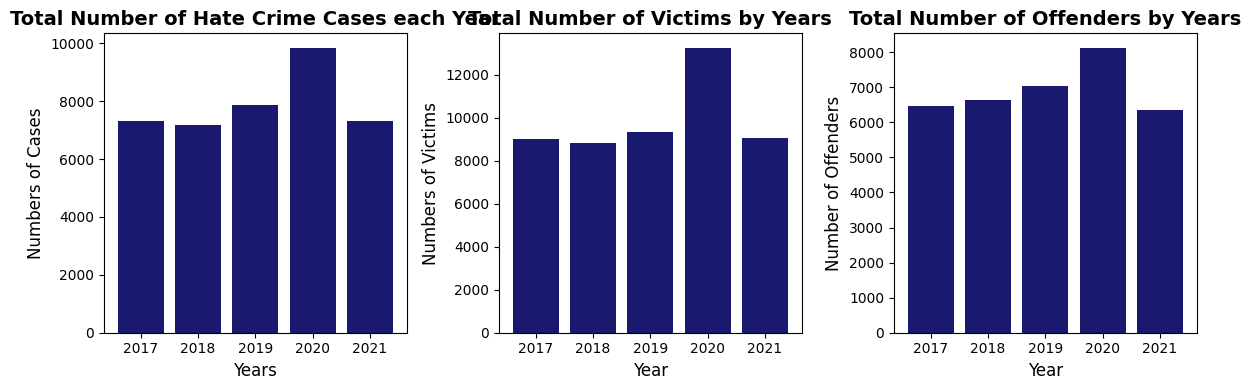

In [59]:
import matplotlib.pyplot as plt

# Figure 생성
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# 첫 번째 서브플롯: Total Number of Hate Crime Cases each Year
axs[0].bar(x=df_each_year['data_year'], height=df_each_year['hate_crime_case'], color='midnightblue')
axs[0].set_title("Total Number of Hate Crime Cases each Year", fontsize=14, weight='bold')
axs[0].set_xlabel('Years', fontsize=12)
axs[0].set_ylabel('Numbers of Cases', fontsize=12)

# 두 번째 서브플롯: Total Number of Victims by Years
axs[1].bar(x=df_each_year['data_year'], height=df_each_year['number_of_victims'], color='midnightblue')
axs[1].set_title("Total Number of Victims by Years", fontsize=14, weight='bold')
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Numbers of Victims', fontsize=12)

# 세 번째 서브플롯: Total Number of Offenders by Years
axs[2].bar(x=df_each_year['data_year'], height=df_each_year['number_of_offenders'], color='midnightblue')
axs[2].set_title("Total Number of Offenders by Years", fontsize=14, weight='bold')
axs[2].set_xlabel('Year', fontsize=12)
axs[2].set_ylabel('Number of Offenders', fontsize=12)

# 서브플롯 간의 간격 조정 -> tight_layout() : subplot간의 간격을 자동으로 조절하여 그래프가 겹치지 않게 해줌
plt.tight_layout()

# 그래프 출력
plt.show()


## 2017~2021 지역 별 각 주의 증오범죄 사건, 피해자 및 범죄자의 총 수

In [62]:
df3 = df2.groupby(['region_name']).agg(hate_crime_case = ('region_name', 'size'), number_of_victims = ('victim_count', 'sum'), number_of_offenders = ('total_offender_count', 'sum'))
agg_data2 = pd.DataFrame(df3).reset_index()
agg_data2.columns = ['region_name', 'hate_crime_case','number_of_victims', 'number_of_offenders']
agg_data2

,region_name,hate_crime_case,number_of_victims,number_of_offenders
0,Midwest,8134,11093,7640
1,Northeast,9441,10241,6253
2,Other,553,1411,542
3,South,9783,12214,9573
4,West,11609,14536,10629


Text(0.5, 1.0, 'Number of Hate Crime Cases, Victims and Offenders of each Region')

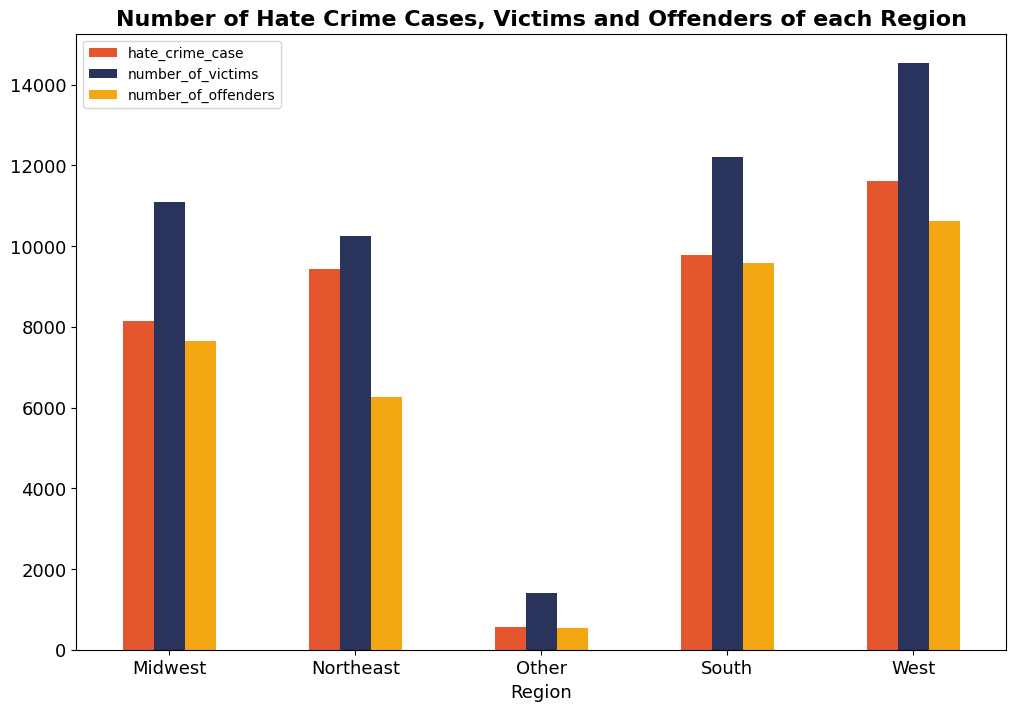

In [63]:
fig = agg_data2.plot(x='region_name',
                figsize = (12, 8),
                kind='bar',
                stacked=False,
                rot = 0,
                color = ['#E4572E', '#29335C', '#F3A712'])
fig.tick_params(axis='x', labelsize = 13)
fig.tick_params(axis='y', labelsize = 13)
fig.set_xlabel("Region", fontsize = 13)
plt.title('Number of Hate Crime Cases, Victims and Offenders of each Region', fontsize = 16, weight = 'bold')

## 범죄자의 인종에 따른 혐오범죄

In [64]:
df_offenders_race = df2.groupby(['offender_race']).agg(number_of_offenders = ('offender_race', 'size'))
df_offenders_race = pd.DataFrame(df_offenders_race).reset_index()
df_offenders_race.columns = ['offender_race', 'number_of_offenders']
df_offenders_race

,offender_race,number_of_offenders
0,Asian,312
1,Black or African American,5840
2,Multiple,960
3,Not Specified,6807
4,Others,377
5,Unknown,9847
6,White,15377


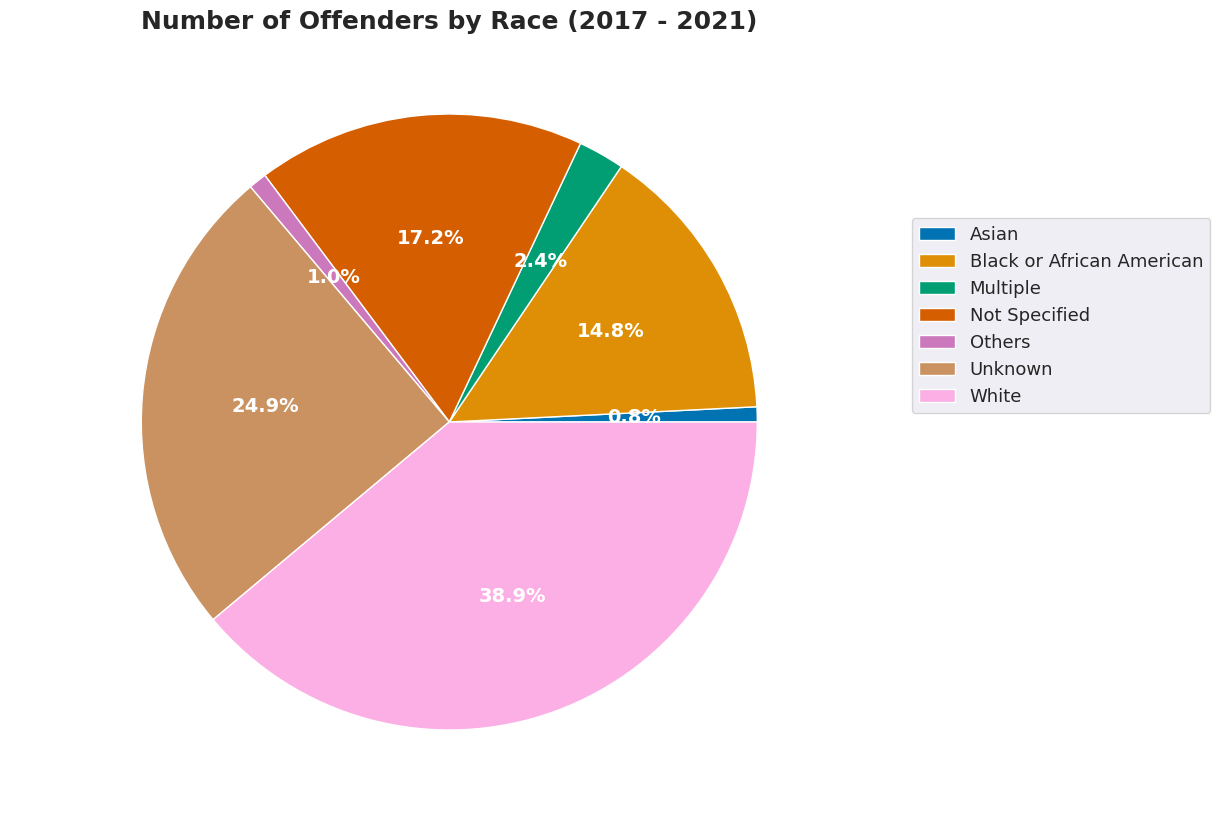

In [72]:
sns.set()
sns.set_palette('colorblind')

plt.figure(figsize = (14,10))
plt.pie(df_offenders_race['number_of_offenders'],
        labels = df_offenders_race['offender_race'].values,
        autopct = '%.1f%%',
        textprops = {'fontsize': '14',
                     'fontweight': 'bold',
                     'rotation': 'horizontal',
                     'color': 'w'})
plt.legend()
plt.title('Number of Offenders by Race (2017 - 2021)', fontsize = 18, fontweight = 'bold')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.5, 0.5), fontsize = 13)
plt.show()

In [73]:
top_5_most_offense_name = df2['offense_name'].value_counts().head(5)
top_5_most_offense_name

Intimidation                                10940
Destruction/Damage/Vandalism of Property    10006
Simple Assault                               8122
Aggravated Assault                           4130
All Other Larceny                             843
Name: offense_name, dtype: int64

In [74]:
top_5_least_offense_name = df2['offense_name'].value_counts().tail(5)
top_5_least_offense_name

Destruction/Damage/Vandalism of Property;Kidnapping/Abduction                    1
Human Trafficking, Commercial Sex Acts;Intimidation                              1
Aggravated Assault;Intimidation;Robbery                                          1
Destruction/Damage/Vandalism of Property;Simple Assault;Weapon Law Violations    1
Aggravated Assault;Simple Assault;Weapon Law Violations                          1
Name: offense_name, dtype: int64

In [75]:
top_5_most_common_location = df2['location_name'].value_counts().head(5)
top_5_most_common_location

Residence/Home                        11090
Highway/Road/Alley/Street/Sidewalk     7079
Other/Unknown                          3769
Parking/Drop Lot/Garage                2301
School-Elementary/Secondary            1923
Name: location_name, dtype: int64

In [76]:
top_5_least_common_location = df2['location_name'].value_counts().tail(5)
top_5_least_common_location

ATM Separate from Bank;Residence/Home                 1
Drug Store/Doctor's Office/Hospital;Field/Woods       1
Air/Bus/Train Terminal;School-Elementary/Secondary    1
Government/Public Building;Other/Unknown              1
Parking/Drop Lot/Garage;Park/Playground               1
Name: location_name, dtype: int64

In [77]:
top_5_motivations_hc = df2['bias_desc'].value_counts().head(5)
top_5_motivations_hc

Anti-Black or African American    11881
Anti-White                         4180
Anti-Jewish                        4037
Anti-Gay (Male)                    3485
Anti-Hispanic or Latino            2529
Name: bias_desc, dtype: int64

In [78]:
top_5_most_hc_victim_types = df2['victim_types'].value_counts().head(5)
top_5_most_hc_victim_types

Individual        30735
Business           2459
Other              1904
Government         1428
Society/Public     1067
Name: victim_types, dtype: int64

In [79]:
top_5_least_hc_victim_types = df2['victim_types'].value_counts().tail(5)
top_5_least_hc_victim_types

Government;Individual;Religious Organization         1
Government;Other                                     1
Individual;Religious Organization;Society/Public     1
Law Enforcement Officer;Unknown                      1
Government;Law Enforcement Officer;Society/Public    1
Name: victim_types, dtype: int64

In [95]:
df2['multiple_offense'].unique()

array(['S', 'M'], dtype=object)

In [97]:
multiple_offense = df2['multiple_offense'].value_counts()
multiple_offense = pd.DataFrame(multiple_offense).reset_index()
multiple_offense.columns = ['type', 'number_of_cases']
multiple_offense

,type,number_of_cases
0,S,38106
1,M,1414


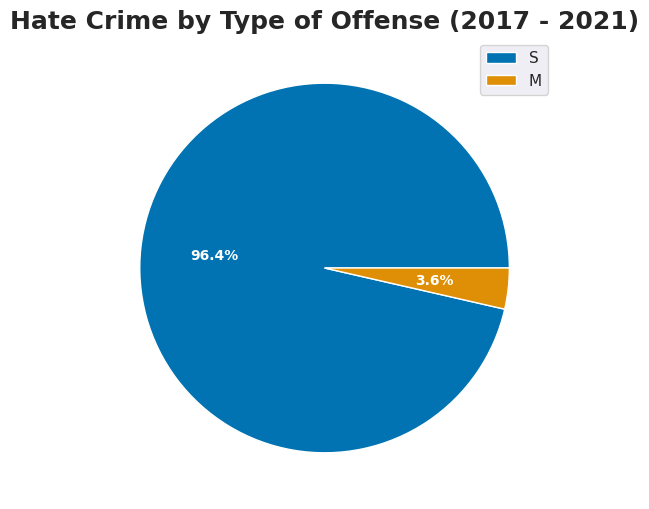

In [100]:
sns.set()
sns.set_palette('colorblind')

plt.figure(figsize = (9,6))
plt.pie(multiple_offense['number_of_cases'],
        labels = multiple_offense['type'].values,
        autopct = '%.1f%%',
        textprops = {'fontsize': '10',
                     'fontweight': 'bold',
                     'rotation': 'horizontal',
                     'color': 'w'})
plt.legend()
plt.title('Hate Crime by Type of Offense (2017 - 2021)', fontsize = 18, fontweight = 'bold')
plt.show()